In [1]:
from simple_lama_inpainting import SimpleLama
from PIL import Image, ImageChops, ImageDraw
import numpy as np
import cv2
import os
from torchmetrics.image.fid import FrechetInceptionDistance
import torch
from diffusers import AutoPipelineForInpainting
from diffusers.utils import load_image, make_image_grid
from PIL import Image
import numpy as np


/home/ludo/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def image_mask_generator(images_dir, masks_dir, image_files):
    """
    Generator to read images and their corresponding masks.

    Args:
    - images_dir (str): Directory containing the images.
    - masks_dir (str): Directory containing the masks.
    - image_files (list): List of filenames (same for both images and masks).

    Yields:
    - tuple: A tuple containing a PIL image and a corresponding mask (PIL image).
    """
    for fname in image_files:
        image_path = os.path.join(images_dir, fname)  # Full path to the image
        mask_path = os.path.join(masks_dir, fname)  # Full path to the mask
        
        # Load image and mask
        try:
            image = Image.open(image_path).convert('RGB')  # Convert image to RGB
            mask = Image.open(mask_path).convert('L')  # Convert mask to grayscale (L)
            
            # Yield image and mask
            yield fname, image, mask
        except Exception as e:
            print(f"Error loading {fname}: {e}")

In [3]:

# Directories
images_dir = './Dataset_new/images'
masks_dir = './Dataset_new/masks'

# Initialize output
image_files = {}

# List all files in images and masks directories
image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg') and f in os.listdir(masks_dir)]

print(f'Found {len(image_files)} images')

Found 603 images


In [4]:
image_gen = image_mask_generator(images_dir, masks_dir, image_files[:1])
for fname, image, mask in image_gen:

    break 



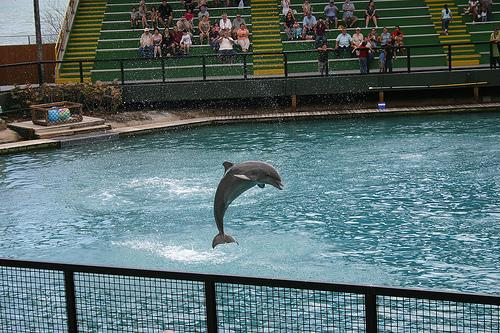

In [5]:
image

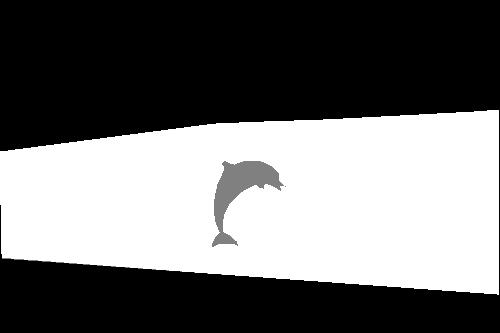

In [6]:
mask

In [26]:

import pandas as pd
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
mask_resized = mask.resize((30, 30))

# Convert to NumPy array
mask_array = np.array(mask_resized)

print(f"Shape of mas {mask_array.shape}")



Shape of mas (30, 30)


In [27]:
pd.DataFrame(mask_array)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,17,31


In [25]:
image_resized = image.resize((30, 30))  # Resize image to 30x30

# Convert to NumPy array
image_array = np.array(image_resized)

print(f"Shape of image {image_array.shape}")

# Split into Red, Green, and Blue channels
red_channel = image_array[:, :, 0]
green_channel = image_array[:, :, 1]
blue_channel = image_array[:, :, 2]

# Create DataFrames for each channel
red_df = pd.DataFrame(red_channel)
green_df = pd.DataFrame(green_channel)
blue_df = pd.DataFrame(blue_channel)

Shape of image (30, 30, 3)


In [22]:
red_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,174,168,150,178,96,57,53,45,67,43,38,50,59,43,55,67,76,86,67,57,72,59,49,41,38,53,69,50,63,38
1,178,171,140,165,82,65,56,55,75,55,56,83,78,85,67,72,72,69,80,59,55,52,57,40,42,48,74,57,47,38
2,183,176,142,148,69,70,59,51,68,68,80,86,93,132,115,81,76,70,81,54,62,59,61,58,45,45,56,60,44,46
3,172,157,123,126,67,74,56,50,108,99,70,98,66,125,134,84,77,62,67,43,107,124,81,80,49,33,58,70,36,54
4,86,81,74,88,70,73,54,53,58,61,51,61,47,91,74,78,73,43,42,50,45,73,52,36,33,30,39,59,44,31
5,62,60,58,70,61,56,32,34,39,43,44,42,47,53,48,71,73,48,49,45,46,38,35,39,41,44,47,90,85,32
6,48,49,42,75,67,62,49,50,58,55,57,56,55,64,60,98,106,61,60,58,60,46,43,42,49,51,45,49,44,35
7,73,73,61,95,93,82,76,58,59,60,58,57,53,54,51,58,48,40,43,40,39,37,37,33,35,32,34,32,31,21
8,54,55,60,50,40,58,71,51,38,38,38,37,36,35,34,38,33,30,25,25,25,19,23,17,11,11,12,10,20,16
9,19,34,69,88,57,29,34,34,34,33,27,29,31,29,26,27,37,43,37,38,39,49,56,54,46,49,49,47,48,49


In [23]:
green_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,191,183,162,192,94,59,64,63,66,46,47,44,56,49,64,69,76,86,69,68,75,69,58,62,58,62,71,61,55,41
1,194,185,151,172,82,68,69,67,64,44,53,59,75,88,75,78,77,65,83,63,57,56,56,64,64,64,79,62,47,48
2,197,190,151,149,71,76,73,67,67,62,65,74,71,109,91,82,79,68,73,46,61,63,67,61,64,65,57,65,61,62
3,183,166,125,120,68,78,74,71,105,79,49,90,59,103,104,87,85,74,65,51,119,108,69,59,59,60,65,71,56,60
4,61,55,51,69,73,81,75,74,66,55,43,68,62,90,77,81,78,65,61,49,53,51,48,35,44,52,53,62,58,46
5,34,36,39,59,63,63,54,52,54,54,58,62,63,59,62,78,76,65,71,55,65,45,41,49,57,66,61,79,78,42
6,28,31,30,64,68,70,70,67,76,72,77,77,72,81,75,92,93,69,72,64,72,56,48,47,54,57,51,49,48,40
7,60,56,51,76,77,74,74,63,67,66,63,63,59,59,56,62,53,47,49,49,48,45,45,40,42,39,37,35,32,26
8,55,48,50,42,37,49,58,49,46,45,46,45,42,42,40,43,37,32,30,29,29,24,24,17,14,13,12,11,17,15
9,26,31,56,78,48,27,32,34,35,35,29,29,29,27,25,27,34,34,33,35,36,43,52,49,40,43,44,42,44,44


In [24]:
blue_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,202,193,169,197,79,23,39,46,56,38,38,41,51,41,59,27,48,80,54,63,76,60,45,42,40,34,30,37,51,36
1,202,191,155,173,59,26,45,54,58,38,47,59,67,79,63,36,42,58,84,64,56,46,44,43,44,39,56,35,41,43
2,209,198,157,149,41,30,51,51,57,55,58,66,64,111,80,41,41,68,80,43,47,50,52,43,40,41,32,25,39,42
3,191,171,128,111,32,36,53,50,93,78,51,89,55,102,95,43,40,65,61,46,118,100,63,57,37,35,30,26,27,38
4,48,39,36,48,33,39,51,52,64,57,41,57,51,93,71,43,37,44,45,41,49,49,49,33,30,32,31,24,26,29
5,21,25,31,39,30,34,35,37,45,46,48,46,50,54,52,42,37,46,53,45,48,41,41,42,40,44,41,32,37,34
6,18,18,22,36,30,43,50,52,62,59,59,58,58,65,63,55,49,54,62,60,61,52,44,43,48,51,46,42,40,36
7,52,45,42,46,40,45,57,57,62,60,58,58,54,55,52,59,50,42,45,44,43,39,39,35,36,32,27,24,22,19
8,49,38,38,31,29,34,45,43,43,41,41,40,38,38,36,41,36,29,27,27,27,22,19,13,11,11,9,8,11,12
9,20,22,46,75,38,23,27,31,35,33,27,27,27,26,24,24,32,28,28,30,31,36,53,48,30,34,34,33,35,37
